In [71]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import numpy as np 

arr = np.ones((10,5))

x = np.concatenate([[arr]]).transpose((1,2,0))
x.shape

(10, 5, 1)

In [23]:
prices = np.array([100,200,400,500,600])
print((prices > 500).any(axis = 0))

True


In [1]:

url = "https://api.hearthstonejson.com/v1/190920/enUS/cards.json"

resp = requests.get(url, timeout=30)
resp.raise_for_status()               # raise on HTTP error
cards = resp.json()                  # list of dicts


NameError: name 'requests' is not defined

In [11]:
df = pd.DataFrame(cards)
df[df["type"].isin["MINION","SPELL"]]

TypeError: 'method' object is not subscriptable

In [16]:
df.type.unique()

array(['HERO', 'MINION', 'SPELL', 'ENCHANTMENT', 'WEAPON', 'HERO_POWER',
       'MOVE_MINION_HOVER_TARGET', 'BATTLEGROUND_HERO_BUDDY',
       'BATTLEGROUND_QUEST_REWARD', 'BATTLEGROUND_ANOMALY',
       'BATTLEGROUND_SPELL', 'LOCATION', 'LETTUCE_ABILITY', nan,
       'GAME_MODE_BUTTON'], dtype=object)

In [47]:
df[(df["type"].isin(["MINION","SPELL","ENCHANTMENT"])) & ( ~ df.id.str.contains("bot",case=False,na=False)) & (~ df.collectible.isna())].to_json("hs_valid_cards.json")

In [124]:
df_valid = pd.read_json("hs_valid_cards.json")
df_valid.columns

# columns to include - > cardClass , health, ,name, set, type, rarity, attack,cost,text,mechanics,durability,overload, spellDamage, armor,classes

Index(['cardClass', 'dbfId', 'health', 'heroPowerDbfId', 'id', 'name', 'set',
       'type', 'artist', 'rarity', 'attack', 'cost', 'faction', 'collectible',
       'flavor', 'spellSchool', 'text', 'mechanics', 'race', 'races',
       'referencedTags', 'elite', 'targetingArrowText', 'durability',
       'overload', 'spellDamage', 'battlegroundsPremiumDbfId', 'techLevel',
       'collectionText', 'hasDiamondSkin', 'howToEarnGolden', 'armor',
       'howToEarn', 'hideCost', 'hideStats', 'mercenariesRole',
       'isBattlegroundsPoolMinion', 'battlegroundsNormalDbfId',
       'battlegroundsBuddyDbfId', 'battlegroundsHero', 'isBattlegroundsBuddy',
       'battlegroundsSkinParentId', 'battlegroundsDarkmoonPrizeTurn',
       'countAsCopyOfDbfId', 'classes', 'puzzleType', 'multiClassGroup',
       'isMiniSet', 'mercenariesAbilityCooldown', 'questReward'],
      dtype='object')

In [125]:
df_final = df_valid[["cardClass", "health", "name", "set", "type", "rarity", "attack","cost","text","mechanics","durability"]]
df_final

,cardClass,health,name,set,type,rarity,attack,cost,text,mechanics,durability
12,MAGE,NaN,Flame Lance,TGT,SPELL,COMMON,NaN,5,Deal $25 damage\nto a minion.,None,NaN
13,MAGE,NaN,Effigy,TGT,SPELL,RARE,NaN,3,"<b>Secret:</b> When a friendly minion dies, su...",[SECRET],NaN
14,MAGE,2.0,Fallen Hero,TGT,MINION,RARE,3.0,2,Your Hero Power deals 1 extra damage.,[HEROPOWER_DAMAGE],NaN
15,MAGE,NaN,Arcane Blast,TGT,SPELL,EPIC,NaN,1,Deal $2 damage to a minion. This spell gets do...,[RECEIVES_DOUBLE_SPELLDAMAGE_BONUS],NaN
16,MAGE,NaN,Polymorph: Boar,TGT,SPELL,RARE,NaN,3,Transform a minion into a 4/2 Boar with <b>Cha...,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
28578,NEUTRAL,4.0,Crabrider,DARKMOON_FAIRE,MINION,COMMON,1.0,2,<b><b>Rush</b>\nWindfury</b>,"[RUSH, WINDFURY]",NaN
28580,NEUTRAL,3.0,Armor Vendor,DARKMOON_FAIRE,MINION,RARE,1.0,1,<b>Battlecry:</b> Give 4 Armor to each hero.,[BATTLECRY],NaN
28581,WARLOCK,NaN,Backfire,DARKMOON_FAIRE,SPELL,COMMON,NaN,3,Draw 3 cards. Deal $3 damage to your hero.,None,NaN
28582,NEUTRAL,9.0,Runaway Blackwing,DARKMOON_FAIRE,MINION,RARE,9.0,9,"[x]At the end of your turn,\ndeal 9 damage to ...",[TRIGGER_VISUAL],NaN


In [126]:
df_final.mechanics = df_final.mechanics.astype(str)

/var/folders/fq/yks_wlmj1wgfzs678sbpwthc0000gn/T/ipykernel_3925/1924104126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.mechanics = df_final.mechanics.astype(str)


**ATTACK YA DA HEALTHI OLMAYAN KARTLAR SPELL OLUYOR**

In [127]:
df_final.isnull().sum()

cardClass        0
health        1604
name             0
set            114
type             0
rarity           0
attack        1604
cost             0
text            52
mechanics        0
durability    5073
dtype: int64

In [130]:
df_nonspell = df_final.dropna(subset=["health"])
df_nonspell.to_json("df_nonspell.json")

In [7]:
df_final.fillna({"attack":0,"health":0},inplace=True)

/var/folders/fq/yks_wlmj1wgfzs678sbpwthc0000gn/T/ipykernel_3925/4282080803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.fillna({"attack":0,"health":0},inplace=True)


In [8]:
df_final[df_final.duplicated(subset="name")]

,cardClass,health,name,set,type,rarity,attack,cost,text,mechanics,durability
5015,MAGE,2.0,Fallen Hero,PLACEHOLDER_202204,MINION,RARE,3.0,2,Your Hero Power deals 1 extra damage.,['HEROPOWER_DAMAGE'],NaN
5016,MAGE,7.0,Coldarra Drake,PLACEHOLDER_202204,MINION,EPIC,6.0,6,You can use your Hero Power any number of times.,None,NaN
5017,PRIEST,4.0,Holy Champion,CORE,MINION,COMMON,1.0,2,<b>Overheal:</b> Gain +2 Attack.,['OVERHEAL'],NaN
5018,WARLOCK,2.0,Tiny Knight of Evil,PLACEHOLDER_202204,MINION,RARE,3.0,2,"Whenever you discard a card, gain +2/+1.",['TRIGGER_VISUAL'],NaN
5019,ROGUE,1.0,Buccaneer,CORE,MINION,COMMON,2.0,1,"Whenever you equip a weapon, give it +1 Attack.",['TRIGGER_VISUAL'],NaN
...,...,...,...,...,...,...,...,...,...,...,...
28127,NEUTRAL,7.0,Street Trickster,WONDERS,MINION,COMMON,0.0,3,<b>Spell Damage +2</b>,None,NaN
28128,NEUTRAL,5.0,Worgen Greaser,WONDERS,MINION,COMMON,6.0,4,None,None,NaN
28422,NEUTRAL,5.0,Escaped Manasaber,YEAR_OF_THE_DRAGON,MINION,EPIC,3.0,4,"[x]<b>Stealth</b>\nWhenever this attacks,\ngai...","['STEALTH', 'TRIGGER_VISUAL']",NaN
28530,DEMONHUNTER,0.0,Illidari Studies,DARKMOON_FAIRE,SPELL,COMMON,0.0,1,<b>Discover</b> an <b>Outcast</b> card. Your n...,['DISCOVER'],NaN


In [9]:
df_final_clean = df_final.drop_duplicates(subset = "name")
print(df_final.shape[0],df_final_clean.shape[0])

5073 4138


In [10]:
df_final_clean.to_json("cards_clean.json")

***lets first creat text embeddings***

In [28]:
import os
import pandas as pd
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sentence_transformers import SentenceTransformer
import re
from sklearn.preprocessing import OrdinalEncoder

In [30]:
MODEL_NAME = "intfloat/e5-small-v2"
sbert = SentenceTransformer(MODEL_NAME)
df_wo_spell = pd.read_json("df_nonspell.json")
df_final_clean = df_wo_spell.drop_duplicates(subset ="name")
texts = df_final_clean["text"].fillna("").astype(str).tolist()
emb = sbert.encode(texts, batch_size=64, convert_to_numpy=True, normalize_embeddings=True)
emb_dim = emb.shape[1]
emb_df = pd.DataFrame(emb, columns=[f"text_emb_{i:03d}" for i in range(emb_dim)])

In [31]:
df_final_clean.set.value_counts()

set
CORE                       141
RETURN_OF_THE_LICH_KING    123
TITANS                     121
THE_BARRENS                115
THE_SUNKEN_CITY            115
BATTLE_OF_THE_BANDS        109
DARKMOON_FAIRE             103
STORMWIND                  100
REVENDRETH                 100
TGT                        100
GANGS                       99
GILNEAS                     97
WILD_WEST                   95
ALTERAC_VALLEY              94
OG                          94
DRAGONS                     93
EXPERT1                     91
PLACEHOLDER_202204          90
DALARAN                     90
BLACK_TEMPLE                89
TROLL                       89
ULDUM                       88
GVG                         86
SCHOLOMANCE                 84
UNGORO                      82
LOOTAPALOOZA                77
LEGACY                      51
KARA                        28
LOE                         25
WONDERS                     23
BRM                         23
YEAR_OF_THE_DRAGON          23
NAXX

In [32]:
dist = []
# basic euclidian dist
for value in range(1,emb_df.shape[0]):
    dist.append(np.sum((emb_df.iloc[0].values - emb_df.iloc[value].values) ** 2))


In [33]:
df_final_clean[df_final_clean.set=="PLACEHOLDER_202204"]

,cardClass,health,name,set,type,rarity,attack,cost,text,mechanics,durability
5082,MAGE,6,Water Elemental,PLACEHOLDER_202204,MINION,RARE,3,4,<b>Freeze</b> any character damaged by this mi...,['FREEZE'],NaN
5090,WARLOCK,6,Dread Infernal,PLACEHOLDER_202204,MINION,COMMON,6,6,<b>Battlecry:</b> Deal 1 damage to ALL other c...,['BATTLECRY'],NaN
5099,PALADIN,7,Guardian of Kings,PLACEHOLDER_202204,MINION,RARE,5,7,<b>Taunt</b>\n<b>Battlecry:</b> Restore #6 Hea...,"['BATTLECRY', 'TAUNT']",NaN
5107,NEUTRAL,3,Earthen Ring Farseer,PLACEHOLDER_202204,MINION,COMMON,3,3,<b>Battlecry:</b> Restore #3 Health.,['BATTLECRY'],NaN
5108,NEUTRAL,3,River Crocolisk,PLACEHOLDER_202204,MINION,COMMON,2,2,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5490,NEUTRAL,3,Flesheating Ghoul,PLACEHOLDER_202204,MINION,COMMON,3,3,"Whenever a minion dies, gain +1 Attack.",['TRIGGER_VISUAL'],NaN
5500,PRIEST,3,Radiant Elemental,PLACEHOLDER_202204,MINION,COMMON,2,2,Your spells cost (1) less.,['AURA'],NaN
5503,NEUTRAL,8,Stormwatcher,PLACEHOLDER_202204,MINION,COMMON,4,7,<b>Windfury</b>,['WINDFURY'],NaN
5510,PRIEST,5,Lyra the Sunshard,PLACEHOLDER_202204,MINION,LEGENDARY,3,4,"Whenever you cast a spell, add a random Priest...",['TRIGGER_VISUAL'],NaN


In [34]:
df_final_clean[df_final_clean.set=="OG"]

,cardClass,health,name,set,type,rarity,attack,cost,text,mechanics,durability
18681,PALADIN,3,Vilefin Inquisitor,OG,MINION,EPIC,1,1,<b>Battlecry:</b> Your Hero Power becomes 'Sum...,['BATTLECRY'],NaN
18686,SHAMAN,7,Flamewreathed Faceless,OG,MINION,COMMON,7,4,<b>Overload:</b> (2),['OVERLOAD'],NaN
18687,SHAMAN,2,Eternal Sentinel,OG,MINION,EPIC,3,2,<b>Battlecry:</b> Unlock your <b>Overloaded</b...,['BATTLECRY'],NaN
18693,NEUTRAL,5,Silithid Swarmer,OG,MINION,RARE,3,3,Can only attack if your hero attacked this turn.,None,NaN
18694,NEUTRAL,10,"Y'Shaarj, Rage Unbound",OG,MINION,LEGENDARY,10,10,"At the end of your turn, put a minion from you...",['TRIGGER_VISUAL'],NaN
...,...,...,...,...,...,...,...,...,...,...,...
18894,PRIEST,3,Shifting Shade,OG,MINION,RARE,4,4,[x]<b>Deathrattle:</b> Copy a card\nfrom your ...,['DEATHRATTLE'],NaN
18895,NEUTRAL,3,Cyclopian Horror,OG,MINION,EPIC,3,4,<b>Taunt</b>. <b>Battlecry:</b> Gain +1 H...,"['BATTLECRY', 'TAUNT']",NaN
18897,NEUTRAL,4,"Nat, the Darkfisher",OG,MINION,LEGENDARY,2,2,"At the start of your opponent's turn, they hav...",['TRIGGER_VISUAL'],NaN
18898,NEUTRAL,6,Skeram Cultist,OG,MINION,RARE,7,6,[x]<b>Battlecry:</b> Give your C'Thun\n+2/+2 <...,['BATTLECRY'],NaN


In [35]:
df_final_clean[df_final_clean.set=="VANILLA"]

,cardClass,health,name,set,type,rarity,attack,cost,text,mechanics,durability
27641,WARLOCK,15,Lord Jaraxxus,VANILLA,MINION,LEGENDARY,3,9,<b>Battlecry:</b> Destroy your hero and replac...,['BATTLECRY'],NaN
27743,NEUTRAL,5,Illidan Stormrage,VANILLA,MINION,LEGENDARY,7,6,"Whenever you play a card, summon a 2/1 Flame o...",['TRIGGER_VISUAL'],NaN


In [36]:
numeric_cols = ["health", "attack"]
cat_cols     = ["cardClass", "set", "type", "rarity", "mechanics"] 
text_col     = "text"


numeric_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
])

cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1,encoded_missing_value=-2)),
])


preprocess = ColumnTransformer(
    transformers=[
        ("num",  numeric_pipe, numeric_cols),
        ("cat",  cat_pipe,     cat_cols),
    ],
    remainder="drop"
)




In [87]:
from sklearn.model_selection import cross_validate, KFold,train_test_split,cross_val_score

y = df_final_clean["cost"].to_numpy()
X = pd.concat([df_final_clean.drop(columns=["cost", "text"]).reset_index(drop=True), emb_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=44,test_size=0.3)


In [88]:
numeric_cols = ["health", "attack"] + emb_df.columns.tolist()
cat_cols     = ["cardClass", "set", "type", "rarity", "mechanics"]

In [89]:
for col in cat_cols:
    print(col, df_final_clean[col].nunique())

cardClass 12
set 36
type 1
rarity 5
mechanics 257


In [90]:
rf_pipe = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(n_estimators=600, random_state=42, n_jobs=-1))
])

# 3) Regular K-Fold CV (no stratification)
from sklearn.model_selection import KFold, cross_validate

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(
    rf_pipe, X, y, cv=kf, n_jobs=-1, return_train_score=False,
    scoring={"rmse":"neg_root_mean_squared_error", "mae":"neg_mean_absolute_error", "r2":"r2"}
)

rmse = -scores["test_rmse"]; mae = -scores["test_mae"]; r2 = scores["test_r2"]
print("RF (SBERT-precomputed) — 5-fold CV (no stratification)")
print(f"RMSE: {rmse.mean():.3f} ± {rmse.std():.3f}")
print(f"MAE : {mae.mean():.3f} ± {mae.std():.3f}")
print(f"R²  : {r2.mean():.3f} ± {r2.std():.3f}")

RF (SBERT-precomputed) — 5-fold CV (no stratification)
RMSE: 1.405 ± 0.184
MAE : 0.892 ± 0.040
R²  : 0.623 ± 0.073


In [91]:
from sklearn.metrics import r2_score
rf_baseline = rf_pipe.fit(X_train,y_train)
preds = rf_baseline.predict(X_test)

r2 = r2_score(y_test,preds)
print(r2)

0.6471606574920441


In [92]:
import xgboost as xg

xg_baseline = Pipeline(steps=[
    ("prep", preprocess),
    ("model", xg.XGBRegressor(
        random_state=42,
        n_jobs=-1
    ))
])



cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(
    xg_baseline, X_train, y_train, cv=cv, n_jobs=-1, return_train_score=False,
    scoring={
        "rmse": "neg_root_mean_squared_error",
        "mae":  "neg_mean_absolute_error",
        "r2":   "r2"
    }
)



rmse = -scores["test_rmse"]
mae  = -scores["test_mae"]
r2   =  scores["test_r2"]

print(f"RF Baseline — 5-fold CV")
print(f"RMSE: mean {rmse.mean():.3f} ± {rmse.std():.3f}")
print(f"MAE : mean {mae.mean():.3f} ± {mae.std():.3f}")
print(f"R²  : mean {r2.mean():.3f} ± {r2.std():.3f}")


RF Baseline — 5-fold CV
RMSE: mean 1.533 ± 0.143
MAE : mean 0.937 ± 0.045
R²  : mean 0.564 ± 0.062


In [100]:
import optuna



def objective(trial):
    # Suggest hyperparameters
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "random_state": 42,
        "n_jobs": -1
    }

    # Define pipeline
    xg_pipeline = Pipeline(steps=[
        ("prep", preprocess),
        ("model", xg.XGBRegressor(**params))
    ])

    # 5-Fold CV with RMSE
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        xg_pipeline, X_train, y_train,
        cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1
    )
    
    return -scores.mean()  # minimize RMSE

study = optuna.create_study(
       storage="sqlite:///db.sqlite3",  # Specify the storage URL here.
        study_name="hs-trial-nospell-v5",
        direction="minimize")  # because RMSE lower = better
study.optimize(objective, n_trials=50, n_jobs=1)   # n_trials can be increased



[I 2025-10-30 23:48:58,804] A new study created in RDB with name: hs-trial-nospell-v5
[I 2025-10-30 23:49:00,637] Trial 0 finished with value: 1.4214622497558593 and parameters: {'n_estimators': 258, 'max_depth': 4, 'learning_rate': 0.05319376893894873, 'subsample': 0.5884077326413756, 'colsample_bytree': 0.5267874251228386}. Best is trial 0 with value: 1.4214622497558593.
[I 2025-10-30 23:49:00,831] Trial 1 finished with value: 1.5808098077774049 and parameters: {'n_estimators': 375, 'max_depth': 4, 'learning_rate': 0.2462810033216321, 'subsample': 0.8062203402259148, 'colsample_bytree': 0.6929283716952112}. Best is trial 0 with value: 1.4214622497558593.
[I 2025-10-30 23:49:01,014] Trial 2 finished with value: 1.45915629863739 and parameters: {'n_estimators': 424, 'max_depth': 3, 'learning_rate': 0.07402016678793506, 'subsample': 0.560045231017229, 'colsample_bytree': 0.5087867008817928}. Best is trial 0 with value: 1.4214622497558593.
[I 2025-10-30 23:49:01,251] Trial 3 finished wit

In [101]:
import numpy as np

best_params = study.best_trial.params
print("Best params:", best_params)

# Build the final pipeline with the best params
xgb_best = Pipeline(steps=[
    ("prep", preprocess),                       # your ColumnTransformer (no text; SBERT precomputed)
    ("model", xg.XGBRegressor(
        **best_params,
        random_state=42,
        n_jobs=-1,
        objective="reg:squarederror",          # explicit for safety
        tree_method="hist",                    # fast & stable default
        eval_metric="rmse"
    ))
])

# Fit on TRAIN only
xgb_best.fit(X_train, y_train)

# Predict on TEST
y_pred = xgb_best.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
print(f"Test RMSE: {np.sqrt(mse):.4f}")
print(f"Test MAE : {mae:.4f}")
print(f"Test R^2 : {r2:.4f}")


Best params: {'n_estimators': 257, 'max_depth': 4, 'learning_rate': 0.01223096186979286, 'subsample': 0.5272771849714747, 'colsample_bytree': 0.9426660673792713}
Test RMSE: 1.2244
Test MAE : 0.8334
Test R^2 : 0.7030


In [102]:
X_test.sample(1)

,cardClass,health,name,set,type,rarity,attack,mechanics,durability,text_emb_000,...,text_emb_374,text_emb_375,text_emb_376,text_emb_377,text_emb_378,text_emb_379,text_emb_380,text_emb_381,text_emb_382,text_emb_383
141,SHAMAN,6,Bearon Gla'shear,ALTERAC_VALLEY,MINION,LEGENDARY,6,['BATTLECRY'],NaN,-0.084194,...,-0.048046,-0.074383,0.010121,-0.009478,-0.050349,0.022228,-0.001041,0.015144,-0.034214,0.091994


In [103]:
predictions_df = pd.DataFrame({"prediction":y_pred,"y_test":y_test,"card_set":X_test.set.values,"card_name":X_test.name.values})
predictions_df

,prediction,y_test,card_set,card_name
0,3.674379,5,LEGACY,Stormpike Commando
1,2.852375,2,THE_SUNKEN_CITY,Trench Surveyor
2,8.991127,10,ULDUM,Colossus of the Moon
3,5.675163,7,None,Archbishop Benedictus
4,2.160155,2,TROLL,Spirit of the Bat
...,...,...,...,...
855,4.805360,7,THE_BARRENS,Mutanus the Devourer
856,1.685674,1,CORE,Murloc Tidecaller
857,2.404580,3,YEAR_OF_THE_DRAGON,Skydiving Instructor
858,6.061805,6,DALARAN,Unseen Saboteur


In [104]:
predictions_df["diff"]= np.abs((predictions_df["y_test"] -  predictions_df["prediction"]))

In [105]:
predictions_df.sort_values(by = "diff",ascending=False).head(15)

,prediction,y_test,card_set,card_name,diff
775,5.034715,20,WILD_WEST,"Reska, the Pit Boss",14.965285
684,2.097601,8,TROLL,"Hir'eek, the Bat",5.902399
692,4.755585,10,STORMWIND,Goldshire Gnoll,5.244415
745,2.070500,7,LOOTAPALOOZA,Lynessa Sunsorrow,4.929500
440,4.464029,9,DARKMOON_FAIRE,Carnival Clown,4.535971
95,5.800201,10,WILD_WEST,Living Horizon,4.199799
37,4.187368,8,BATTLE_OF_THE_BANDS,Cage Head,3.812632
744,5.194398,9,ALTERAC_VALLEY,Wing Commander Ichman,3.805602
548,4.243208,8,ALTERAC_VALLEY,Abominable Lieutenant,3.756792
402,3.421404,7,ULDUM,Dinotamer Brann,3.578596


In [106]:
predictions_df.card_set.unique()

array(['LEGACY', 'THE_SUNKEN_CITY', 'ULDUM', None, 'TROLL',
       'LOOTAPALOOZA', 'PATH_OF_ARTHAS', 'CORE', 'GILNEAS', 'STORMWIND',
       'BLACK_TEMPLE', 'WONDERS', 'THE_BARRENS', 'GVG', 'WILD_WEST',
       'TGT', 'OG', 'UNGORO', 'LOE', 'TITANS', 'GANGS', 'SCHOLOMANCE',
       'YEAR_OF_THE_DRAGON', 'RETURN_OF_THE_LICH_KING',
       'BATTLE_OF_THE_BANDS', 'EXPERT1', 'KARA', 'DARKMOON_FAIRE',
       'REVENDRETH', 'DALARAN', 'DRAGONS', 'ALTERAC_VALLEY',
       'PLACEHOLDER_202204', 'DEMON_HUNTER_INITIATE', 'BRM', 'NAXX'],
      dtype=object)

In [107]:
predictions_df.groupby("card_set").count()

,prediction,y_test,card_name,diff
card_set,,,,
ALTERAC_VALLEY,28,28,28,28
BATTLE_OF_THE_BANDS,31,31,31,31
BLACK_TEMPLE,24,24,24,24
BRM,9,9,9,9
CORE,34,34,34,34
DALARAN,31,31,31,31
DARKMOON_FAIRE,34,34,34,34
DEMON_HUNTER_INITIATE,2,2,2,2
DRAGONS,28,28,28,28


In [131]:
dates = pd.read_json("expension_dates.json")
dates

,code,name,year
0,LEGACY,Legacy Set / Classic,2014
1,THE_SUNKEN_CITY,Voyage to the Sunken City,2022
2,ULDUM,Saviors of Uldum,2019
3,TROLL,Rastakhan’s Rumble,2018
4,LOOTAPALOOZA,Kobolds & Catacombs,2017
5,PATH_OF_ARTHAS,Path of Arthas,2022
6,CORE,Core Set,2021
7,GILNEAS,The Witchwood,2018
8,STORMWIND,United in Stormwind,2021
9,BLACK_TEMPLE,Ashes of Outland,2020


In [136]:
merged_df = pd.merge(predictions_df,dates, how= "inner",left_on="card_set",right_on="code")
merged_df

,prediction,y_test,card_set,card_name,diff,code,name,year
0,3.674379,5,LEGACY,Stormpike Commando,1.325621,LEGACY,Legacy Set / Classic,2014
1,2.852375,2,THE_SUNKEN_CITY,Trench Surveyor,0.852375,THE_SUNKEN_CITY,Voyage to the Sunken City,2022
2,8.991127,10,ULDUM,Colossus of the Moon,1.008873,ULDUM,Saviors of Uldum,2019
3,2.160155,2,TROLL,Spirit of the Bat,0.160155,TROLL,Rastakhan’s Rumble,2018
4,3.270478,5,LOOTAPALOOZA,"Ixlid, Fungal Lord",1.729522,LOOTAPALOOZA,Kobolds & Catacombs,2017
...,...,...,...,...,...,...,...,...
831,4.805360,7,THE_BARRENS,Mutanus the Devourer,2.194640,THE_BARRENS,Forged in the Barrens,2021
832,1.685674,1,CORE,Murloc Tidecaller,0.685674,CORE,Core Set,2021
833,2.404580,3,YEAR_OF_THE_DRAGON,Skydiving Instructor,0.595420,YEAR_OF_THE_DRAGON,Year of the Dragon Cycle (Rise of Shadows / Ul...,2019
834,6.061805,6,DALARAN,Unseen Saboteur,0.061805,DALARAN,Rise of Shadows,2019


In [137]:
predictions_df.card_set.unique()

array(['LEGACY', 'THE_SUNKEN_CITY', 'ULDUM', None, 'TROLL',
       'LOOTAPALOOZA', 'PATH_OF_ARTHAS', 'CORE', 'GILNEAS', 'STORMWIND',
       'BLACK_TEMPLE', 'WONDERS', 'THE_BARRENS', 'GVG', 'WILD_WEST',
       'TGT', 'OG', 'UNGORO', 'LOE', 'TITANS', 'GANGS', 'SCHOLOMANCE',
       'YEAR_OF_THE_DRAGON', 'RETURN_OF_THE_LICH_KING',
       'BATTLE_OF_THE_BANDS', 'EXPERT1', 'KARA', 'DARKMOON_FAIRE',
       'REVENDRETH', 'DALARAN', 'DRAGONS', 'ALTERAC_VALLEY',
       'PLACEHOLDER_202204', 'DEMON_HUNTER_INITIATE', 'BRM', 'NAXX'],
      dtype=object)

In [138]:
dates.columns

Index(['code', 'name', 'year'], dtype='object')

In [139]:
x = merged_df.groupby("card_set").agg({"diff":"mean"}).reset_index().merge(dates[["year","code"]],left_on="card_set",right_on="code",how="inner")
x

,card_set,diff,year,code
0,ALTERAC_VALLEY,0.859372,2021,ALTERAC_VALLEY
1,BATTLE_OF_THE_BANDS,0.920712,2023,BATTLE_OF_THE_BANDS
2,BLACK_TEMPLE,0.821100,2020,BLACK_TEMPLE
3,BRM,0.428593,2015,BRM
4,CORE,0.522737,2021,CORE
5,DALARAN,0.702889,2019,DALARAN
6,DARKMOON_FAIRE,0.912121,2020,DARKMOON_FAIRE
7,DEMON_HUNTER_INITIATE,0.914635,2020,DEMON_HUNTER_INITIATE
8,DRAGONS,0.919821,2019,DRAGONS
9,EXPERT1,0.868000,2014,EXPERT1


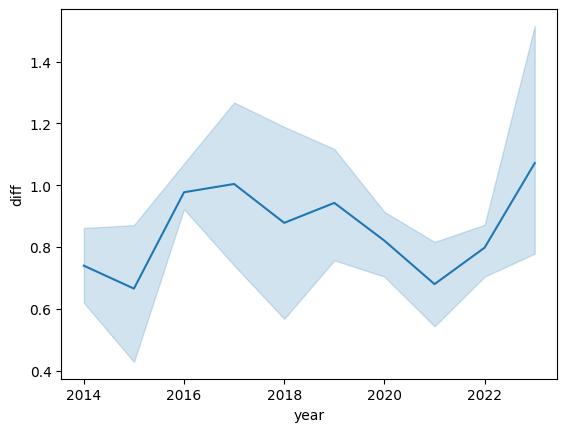

In [141]:

sns.lineplot(x = "year", y = "diff", data=x,)
plt.show()